# CAPSTONE: 
### Google Street View Image Recognition using Convolution Neural Network


### Abstract

In this project, I am implementing a supervised machine learning algorithm to recognize digit from images and then classify them. I am using a deep learning method called Convolutional Neural Network for classification of images. The dataset used is Street View House Numbers images. SVHN is a real-world image dataset for developing machine learning & object recognition algorithms. Thus, input for this problem would be an image containing a digit and output will be a label (0 to 9) for the digit in the input image.




#### About Data

SVHN is a real-world image dataset for developing machine learning & object recognition algorithms. 
http://ufldl.stanford.edu/housenumbers/
10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10.
73257 digits for training, 26032 digits for testing, and 531131 additional, somewhat less difficult samples, to use as extra training data
Comes in two formats:
1. Original images with character level bounding boxes.
2. MNIST-like 32-by-32 images centered around a single character (many of the images do contain some distractors at the sides).


### Convolutional Neural Networks:

CNN is network architecture for deep learning.
3 main concepts for CNN are -
    1. Local Receptive fields
    2. Shared weights and biases
    3. Activation and pooling

In a typical neural network, each neuron in the input layer is connected to the each neuron in the hidden layer and each neuron in the hidden layer is connected to each neuron in output layer.

    1. Local Receptive fields
However, in Convolutional neural network only a small set of input neurons connect to a set set of neurons in the hidden layer. This small set of input neurons is called as local receptive fields. Now this local receptive field is slide over the entire image to create a feature map from the input layer to the hidden layer neurons. For such an operation, we can use convolution. As per wikipedia, convolution is a mathematical operation on two functions(f and g); it produces a third function, that is typically viewed as a modified version of one of the original functions, giving the integral of the point-wise multiplication of two functions as a function of the amount that one of the original functions is translated. (Reference: https://en.wikipedia.org/wiki/Convolution)

    2. Shared weights and biases
CNN also has weights and biases like a typical neural network. Model learns these parameters with every incoming training example and errors made. But in CNN weight and biases are same for all hidden neurons indicating every hidden neuron is detecting same feature like an edge or block or round. Since a same feature is being learned, no matter where the object is present in the image.

    3. Activation and pooling
This step applies transformation to the output of every neuron by using activation functions. Rectified Linear Unit is one common activation function, which takes the neuron output and maps it to the highest positive value near it and if the output is negative then it is mapped to 0. Pooling then condenses the outputs from activation layer neurons into a single output. This helps in reducing the number of parameters that distinguishes images and should be learnt by the model.

When these concepts are put together we can generate a CNN model.
CNNs can have any number of hidden layers. And every layer works to learn a different feature in an image. The final layer neurons in the hidden layers are then like a typical neural network connected to the every neuron in the output layer neurons which produces the final output.

There are 3 ways to train a CNN.
    1. Train the network from scratch (we would need thousands of labeled images for this)
    2. Transfer Learning (using knowledge of solving one type of problem on another similar problem; this requires less amount of labeled data compared to first method)
    3. Feature Extraction method uses a pre trained CNN model to extract features to differentiate objects and then this information is fed to models like SVM, Decision Trees and others for classification (this process requires least amount of data labeled data)



# Data Exploration 

We start by exploring data.
Steps:

A. Load Libraries
    1. Load numpy library for array and mathematical operations
    2. Load Matplotlib library for plotting graphs
    3. Load seaborn library also for plotting graphs
    4. Load urllib2/urlopen library for downloading dataset 
    5. Loading scipy.io / loadmat library for loading .mat files and accessing predictors & labels in datasets
    
B. Download Data
    1. Using urlopen training, testing and validation/extra data is downloaded 
    2. Data is then stored in mat file format
    
C. Print the shape of dataset
    The datasets have 4 dimensions
    
    a. 1st & 2nd dimension corresponds to pixels/size of the image(height x width)
    b. 3rd dimension is for RGB color
    c. 4th dimension is representing the image number in the dataset
    
D. Manipulate the shape of dataset
    The dataset is transposed such that - 
    
    a. 1st column contains image number
    b. 2nd and 3rd column contains height and width
    c. 4th column contains RGB color


E. Plotting the images
    
    a. Create a function that takes in image, label of image, total number of images in each row and column
    b. Plot images from train, test and validation dataset
    
    Inference: Some images are not clear and some images have distractions.
    
F. Printing the histogram of image distributions by its labels

    a. Print count of images by labels in a histogram for all 3 datasets
    b. Replace label 10 with 0
    
    Inference: The image distribution in all 3 datasets is uneven/imbalanced. There are more images that contain 1 than 10s and so on.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [2]:
from urllib2 import urlopen

%mkdir data

urlopen("http://ufldl.stanford.edu/housenumbers/train_32x32.mat", "data/train_32x32.mat")
urlopen("http://ufldl.stanford.edu/housenumbers/test_32x32.mat", "data/test_32x32.mat")
urlopen("http://ufldl.stanford.edu/housenumbers/extra_32x32.mat", "data/extra_32x32.mat")

mkdir: data: File exists


<addinfourl at 4455111568 whose fp = <socket._fileobject object at 0x1098aa0d0>>

In [3]:
from scipy.io import loadmat

# We create a function to load a MAT file
def load_data(path):
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('data/train_32x32.mat')
X_test, y_test = load_data('data/test_32x32.mat')
X_extra, y_extra = load_data('data/extra_32x32.mat')

print("Training", X_train.shape, y_train.shape)
print("Test", X_test.shape, y_test.shape)
print('Extra', X_extra.shape, y_extra.shape)

('Training', (32, 32, 3, 73257), (73257, 1))
('Test', (32, 32, 3, 26032), (26032, 1))
('Extra', (32, 32, 3, 531131), (531131, 1))


In [4]:
# Transpose the image arrays
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]
X_extra, y_extra = X_extra.transpose((3,0,1,2)), y_extra[:,0]

print("Training", X_train.shape)
print("Test", X_test.shape)
print("Extra", X_extra.shape)
print('')

# Calculate the total number of images
number_of_images = X_train.shape[0] + X_test.shape[0] + X_extra.shape[0]

print("Total Images:", number_of_images)

('Training', (73257, 32, 32, 3))
('Test', (26032, 32, 32, 3))
('Extra', (531131, 32, 32, 3))

('Total Images:', 630420)


In [5]:
# we write a function to plot images which takes in number of rows, number of columns and image with its label
def plot_the_images(image, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols)
    for i, a_x in enumerate(axes.flat): 
        if image[i].shape == (32, 32, 3):
            a_x.imshow(image[i])
        else:
            a_x.imshow(image[i,:,:,0])
        a_x.set_xticks([]); a_x.set_yticks([])
        a_x.set_title(labels[i])

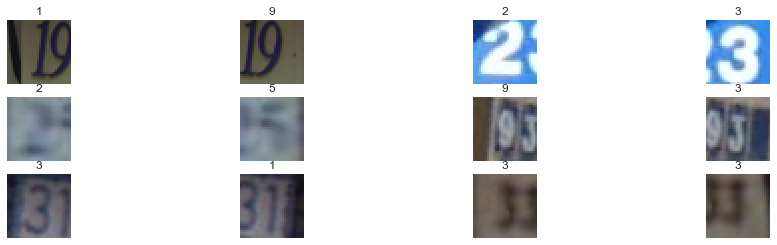

In [6]:
# Plot some training set images
plot_the_images(X_train, y_train, 3, 4)

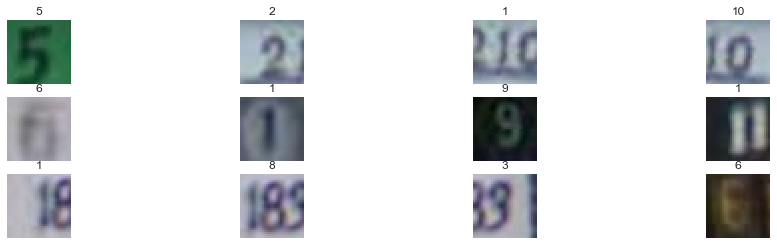

In [7]:
# Plot some testing set images
plot_the_images(X_test, y_test, 3, 4)

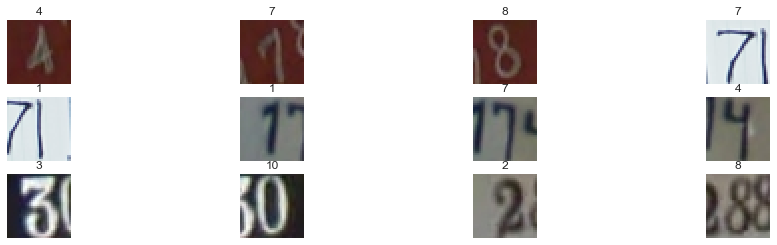

In [8]:
# Plot some extra set images
plot_the_images(X_extra, y_extra, 3, 4)

In [9]:
print(np.unique(y_train))

[ 1  2  3  4  5  6  7  8  9 10]


In [10]:
print(np.unique(y_test))

[ 1  2  3  4  5  6  7  8  9 10]


In [11]:
print(np.unique(y_extra))

[ 1  2  3  4  5  6  7  8  9 10]


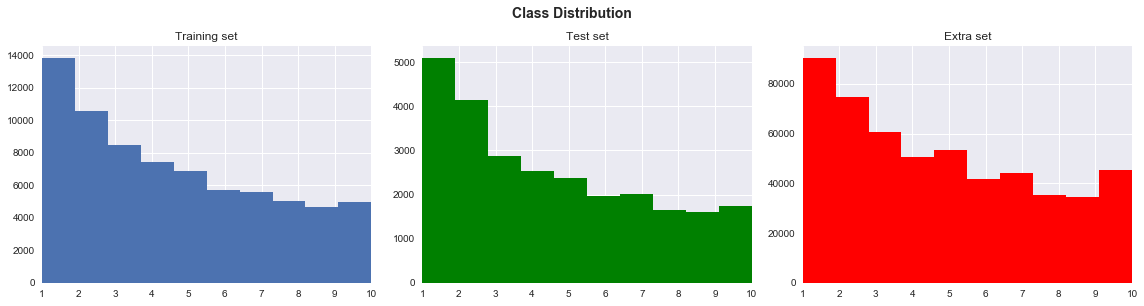

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test set")

ax3.hist(y_extra, color='r', bins=10);
ax3.set_title("Extra set");

fig.tight_layout()

In [13]:
# renaming label 10 as 0
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0
y_extra[y_extra == 10] = 0

In [14]:
# Return a balanced sample of the population"""
def balanced_sample(y, s):
    sample = []
    # For each label in the dataset
    for every_label in np.unique(y):
        # Get the index of all images with certain label
        images = np.where(y== every_label)[0]
        # Get a random sample from the images
        set_sample = np.random.choice(images, size=s, replace=False)
        # Add the random sample to our sample list
        sample += set_sample.tolist()
    return sample

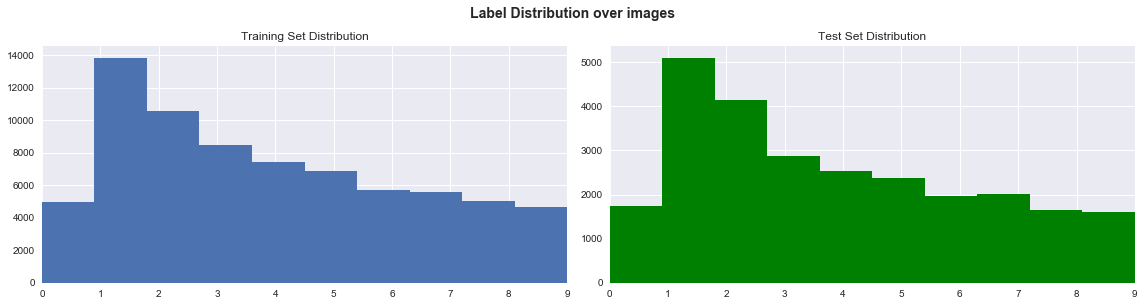

In [15]:
# We plot the histograms to find distribution of images over various labels
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Label Distribution over images', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training Set Distribution")
ax1.set_xlim(0, 9)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test Set Distribution")

fig.tight_layout()

In [16]:
# Pick 500 samples per class from the training samples
train_samples = balanced_sample(y_train, 500)
# Pick 300 samples per class from the extra dataset
extra_samples = balanced_sample(y_extra, 300)

X_val, y_val = np.copy(X_train[train_samples]), np.copy(y_train[train_samples])

# Remove the samples to avoid duplicates from training data
X_train = np.delete(X_train, train_samples, axis=0)
y_train = np.delete(y_train, train_samples, axis=0)

X_val = np.concatenate([X_val, np.copy(X_extra[extra_samples])])
y_val = np.concatenate([y_val, np.copy(y_extra[extra_samples])])

# Remove the samples to avoid duplicates from extra dataset
X_extra = np.delete(X_extra, extra_samples, axis=0)
y_extra = np.delete(y_extra, extra_samples, axis=0)

X_train = np.concatenate([X_train, X_extra])
y_train = np.concatenate([y_train, y_extra])
X_test, y_test = X_test, y_test

print("Training", X_train.shape, y_train.shape)
print("Test", X_test.shape, y_test.shape)
print('Validation', X_val.shape, y_val.shape)

('Training', (596388, 32, 32, 3), (596388,))
('Test', (26032, 32, 32, 3), (26032,))
('Validation', (8000, 32, 32, 3), (8000,))


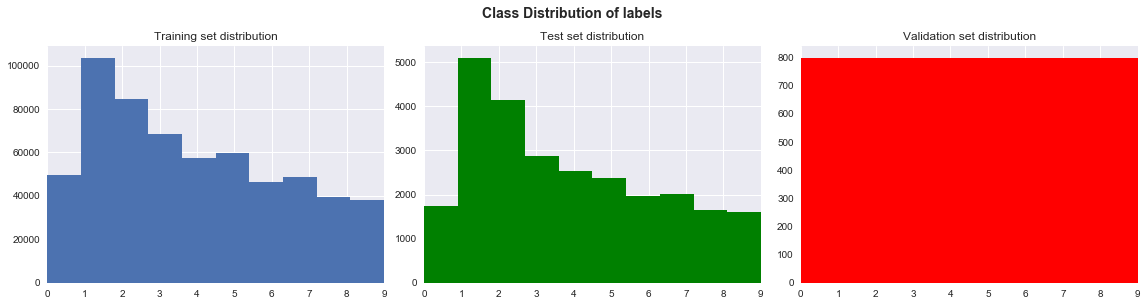

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True)

fig.suptitle('Class Distribution of labels', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set distribution")
ax1.set_xlim(0, 9)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test set distribution")

ax3.hist(y_val, color='r', bins=10);
ax3.set_title("Validation set distribution");

fig.tight_layout()


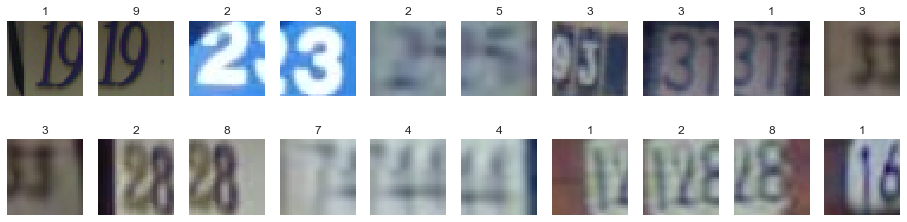

In [18]:
# Assert that we did not remove or add any duplicates
assert(number_of_images == X_train.shape[0] + X_test.shape[0] + X_val.shape[0])

# Display some samples images from the training set
plot_the_images(X_train, y_train, 2, 10)

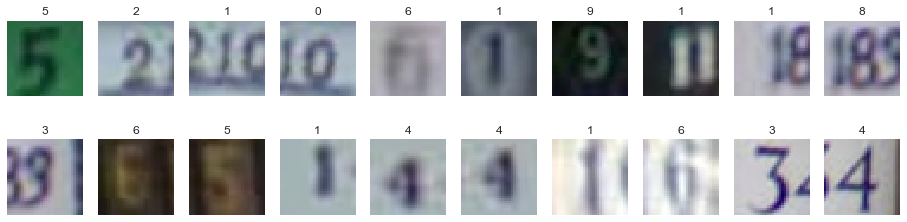

In [19]:
# Display some samples images from the test set
plot_the_images(X_test, y_test, 2, 10)

Dimensions
('Training set', (596388, 32, 32, 3), (596388, 32, 32, 1))
('Test set', (26032, 32, 32, 3), (26032, 32, 32, 1))
('Validation set', (8000, 32, 32, 3), (8000, 32, 32, 1))

Data Type
('Training set', dtype('uint8'), dtype('float32'))
('Test set', dtype('uint8'), dtype('float32'))
('Validation set', dtype('uint8'), dtype('float32'))



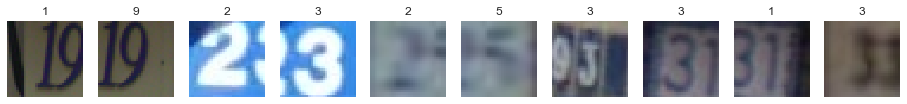

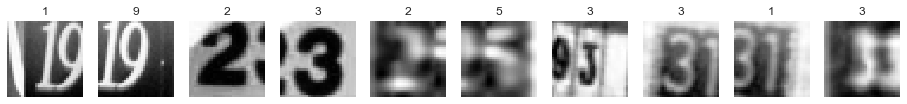

In [20]:
# converting the images to gray from rgb
def rgb_to_gray(images):
    return np.expand_dims(np.dot(images, [0.2989, 0.5870, 0.1140]), axis=3)

# Transform the images to greyscale
train_greyscale = rgb_to_gray(X_train).astype(np.float32)
test_greyscale = rgb_to_gray(X_test).astype(np.float32)
valid_greyscale = rgb_to_gray(X_val).astype(np.float32)


print("Dimensions")
print("Training set", X_train.shape, train_greyscale.shape)
print("Test set", X_test.shape, test_greyscale.shape)
print("Validation set", X_val.shape, valid_greyscale.shape)
print('')

print("Data Type")
print("Training set", X_train.dtype, train_greyscale.dtype)
print("Test set", X_test.dtype, test_greyscale.dtype)
print("Validation set", X_val.dtype, valid_greyscale.dtype)
print('')


plot_the_images(X_train, y_train, 1, 10)
plot_the_images(train_greyscale, y_train, 1, 10)

In [21]:
# Using Encoder for preprocessing label matrix of categorical input & transforming that matrix into sparse matrix 
# where every column corresponds to one possible value of one feature.
from sklearn.preprocessing import OneHotEncoder
 
# Fit the OneHotEncoder
encoder = OneHotEncoder().fit(y_train.reshape(-1, 1))

# Transform the label values to a one-hot-encoding scheme
y_train = encoder.transform(y_train.reshape(-1, 1)).toarray()
y_test = encoder.transform(y_test.reshape(-1, 1)).toarray()
y_val = encoder.transform(y_val.reshape(-1, 1)).toarray()

print("Training set", y_train.shape)
print("Test set", y_test.shape)
print("Training set", y_val.shape)

('Training set', (596388, 10))
('Test set', (26032, 10))
('Training set', (8000, 10))


In [22]:
# Storing the data in h5py in datasets allowing NumPy operations like slicing and other operations.
import h5py

# Create file
h5f1 = h5py.File('data/SVHN_Dataset.h5', 'w')

# Store the datasets
h5f1.create_dataset('X_train', data=X_train)
h5f1.create_dataset('y_train', data=y_train)
h5f1.create_dataset('X_test', data=X_test)
h5f1.create_dataset('y_test', data=y_test)
h5f1.create_dataset('X_val', data=X_val)
h5f1.create_dataset('y_val', data=y_val)

# Close the file
h5f1.close()


# Create file
h5f2 = h5py.File('data/SVHN_Dataset_grey.h5', 'w')

# Store the datasets
h5f2.create_dataset('X_train', data=train_greyscale)
h5f2.create_dataset('y_train', data=y_train)
h5f2.create_dataset('X_test', data=test_greyscale)
h5f2.create_dataset('y_test', data=y_test)
h5f2.create_dataset('X_val', data=valid_greyscale)
h5f2.create_dataset('y_val', data=y_val)

# Close the file
h5f2.close()

In [23]:
# importing required libraries
import os
import time
import math
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 6.0)

print("Tensorflow version", tf.__version__)

('Tensorflow version', '1.1.0')


In [24]:
# Now Open the file in read only mode
h5f2 = h5py.File('data/SVHN_Dataset_grey.h5', 'r')

# Load the training, test and validation data set
X_train = h5f2['X_train'][:]
y_train = h5f2['y_train'][:]
X_test = h5f2['X_test'][:]
y_test = h5f2['y_test'][:]
X_val = h5f2['X_val'][:]
y_val = h5f2['y_val'][:]

# Close the files
h5f2.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

('Training set', (596388, 32, 32, 1), (596388, 10))
('Validation set', (8000, 32, 32, 1), (8000, 10))
('Test set', (26032, 32, 32, 1), (26032, 10))


In [25]:
# Storing image size of 32 pixels in a variable
image_size = X_train.shape[1]

# Greyscale images only have 1 color channel
number_of_channels = X_train.shape[-1]

# Number of classes: one class for every 10 digits
number_of_classes = y_train.shape[1]

In [26]:
# The mean of the training data
train_mean = np.mean(X_train, axis=0)

# The standard deviation of the training data
train_std = np.std(X_train, axis=0)

# Normalize data
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean)  / train_std
X_val = (train_mean - X_val) / train_std

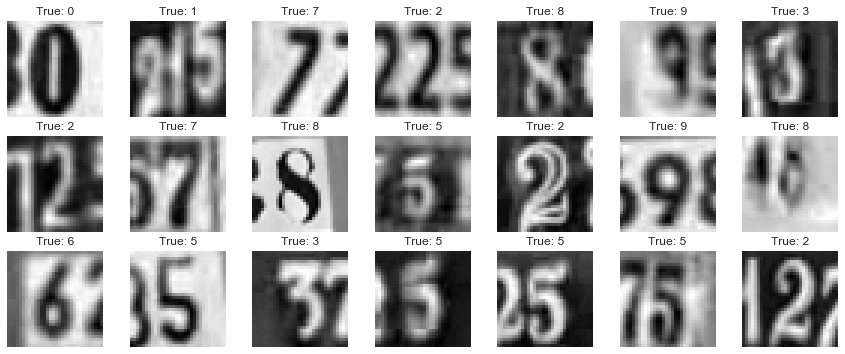

In [27]:
def plot_the_images(images, nrows, ncols, class_true, class_pred=None):
    # Initialize the subplotgrid
    figure, axes = plt.subplots(nrows, ncols)
    # Randomly select nrows * ncols images
    randomselect = np.random.choice(images.shape[0], nrows*ncols)
    # For every axes object in the grid
    for i, ax in zip(randomselect, axes.flat): 
        # When predictions are not passed
        if class_pred is None:
            title = "True: {0}".format(np.argmax(class_true[i]))
        # When predictions are passed, display labels + predictions
        else:
            title = "True: {0}, Pred: {1}".format(np.argmax(class_true[i]), class_pred[i])    
        # Display the image
        ax.imshow(images[i,:,:,0], cmap='binary')
        # Annotate the image
        ax.set_title(title)
        # Specify ticks
        ax.set_xticks([])
        ax.set_yticks([])

# Plot 3 rows with 7 images each from the training set
plot_the_images(X_train, 3, 7, y_train);

In [28]:
# Get an existing variable or create a new variable 
# from specified layer and having specified shape and of specified type
def convolutional_weight_variable(layer_name, shape):
    return tf.get_variable(layer_name, shape=shape, initializer=tf.contrib.layers.xavier_initializer_conv2d())

def fullyconnected_weight_variable(layer_name, shape):
    return tf.get_variable(layer_name, shape=shape, initializer=tf.contrib.layers.xavier_initializer())

def biases_variable(shape):
    return tf.Variable(tf.constant(0.0, shape=shape))

Convolutional layer creator helper function:

This function takes in inputs as -

    1. previous layer
    2. current layer's name
    3. number of input channels(channel's from previous layer)
    4. filter size i.e. height and width of each filter
    5. number of such filters
    6. pooling required or not

This function creates -

    1. shape of the filter weights for the convolution using filter size height, filtersize width, number of input channels and number of filters
    2. convolutional weights are created for this layer of the shape (matrix/tensor) specified in step1 (using previously created tensorflow object of variable creation)
    3. biases for every filter is also created using tensorflow object of biases variable creation 
    4. then the convolutional layer is created where we specify the input tensor, input weights, strides i.e. by how many pixels to shift while convolving over an image, padding = same to ensure constant filter size even at the edges
    5. biases are added to this layer
    6. Every layer is then passed through Rectified Linear Unit (this is like applying an activation function like sigmoid function is applied in logistic regression)
    7. Layer and Weights are returned by the function
    


In [29]:
def convolutional_layer(input,               # The previous layer
                layer_name,         # Layer name
                num_input_channels, # Num. channels in prev. layer
                filter_size,        # Width and height of each filter
                num_filters,        # Number of filters
                pooling=True):      # Use 2x2 max-pooling

    # Specify shape of the filter-weights for the convolution
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Creating new filters with the given shape
    weights = convolutional_weight_variable(layer_name, shape=shape)
    
    # Creating new biases, one for each filter
    biases = biases_variable(shape=[num_filters])

    # Creating the TensorFlow operation for convolutions
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME') # with zero padding

    # Adding the biases to convolution layer outputs
    layer += biases
    
    # Rectified Linear Unit (RELU)
    layer = tf.nn.relu(layer)

    # For down sampling
    if pooling:
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Return resulting layer and filter-weights
    return layer, weights


In [30]:
def flattened_layer(layer):
    # Getting the shape of the input layer
    layer_shape = layer.get_shape()
    # The number of features =  image_height * image_width * number_of_channels
    number_of_features = layer_shape[1:4].num_elements()
    # Reshaping the layer to [num_images, num_of_features].
    layer_flat = tf.reshape(layer, [-1, number_of_features])
    # Returning the flattened layer and the number of features.
    return layer_flat, number_of_features

In [31]:
def fully_connected_layer(input,        #  previous layer
             layer_name,   #  layer name
             num_inputs,   # Number of inputs from prev. layer
             num_outputs,  # Num of outputs
             relu=True):   # Use rectified linear unit

    # Create new weights and biases.
    weights = fullyconnected_weight_variable(layer_name, shape=[num_inputs, num_outputs])
    biases = biases_variable(shape=[num_outputs])

    # Calculate the layer activation
    layer = tf.matmul(input, weights) + biases

    # Use Rectrified Linear Unit
    if relu:
        layer = tf.nn.relu(layer)

    return layer

In [32]:
# Convolutional Layer 1
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
number_filters1 = 32         # There are 16 of these filters.

# Convolutional Layer 2
filter_size2 = 5          # Convolution filters are 5 x 5 pixels.
number_filters2 = 64         # There are 36 of these filters.

# Fully-connected layer
fully_connected_size = 256            # Number of neurons in fully-connected layer.

In [33]:
x = tf.placeholder(tf.float32, shape=(None, image_size, image_size, number_of_channels), name='x')

In [34]:
y_true = tf.placeholder(tf.float32, shape=[None, 10], name='y_true')

y_true_class = tf.argmax(y_true, dimension=1)

In [35]:
keep_probability = tf.placeholder(tf.float32)

In [36]:
convolutional_layer_1, w_c1 = convolutional_layer(input=x,
                          layer_name="convolutional_layer_1",
                          num_input_channels=number_of_channels,
                          filter_size=filter_size1,
                          num_filters=number_filters1,
                          pooling=True)

convolutional_layer_1

<tf.Tensor 'MaxPool:0' shape=(?, 16, 16, 32) dtype=float32>

In [37]:
convolutional_layer_2, w_c2 = convolutional_layer(input=convolutional_layer_1,
                          layer_name="convolutional_layer_2",
                          num_input_channels=number_filters1,
                          filter_size=filter_size2,
                          num_filters=number_filters2,
                          pooling=True)

# Applying dropout after the pooling operation
dropout = tf.nn.dropout(convolutional_layer_2, keep_probability)

dropout

<tf.Tensor 'dropout/mul:0' shape=(?, 8, 8, 64) dtype=float32>

In [38]:
layer_flattened, number_of_features = flattened_layer(dropout)

layer_flattened

<tf.Tensor 'Reshape:0' shape=(?, 4096) dtype=float32>

In [39]:
fully_connected_layer_1 = fully_connected_layer(input=layer_flattened,
                layer_name="fully_connected_layer_1",
                num_inputs=number_of_features,
                num_outputs=fully_connected_size,
                relu=True)

fully_connected_layer_1

<tf.Tensor 'Relu_2:0' shape=(?, 256) dtype=float32>

In [40]:
fully_connected_layer_2 = fully_connected_layer(input=fully_connected_layer_1,
                layer_name="fully_connected_layer_2",
                num_inputs=fully_connected_size,
                num_outputs=number_of_classes,
                relu=False)

fully_connected_layer_2

<tf.Tensor 'add_3:0' shape=(?, 10) dtype=float32>

In [41]:
y_prediction = tf.nn.softmax(fully_connected_layer_2)
# The class is the index of the largest element value
y_prediction_class = tf.argmax(y_prediction, dimension=1)

In [42]:
# Cross-entropy calculation
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=fully_connected_layer_2, labels=y_true)

# The average of the cross-entropy for all the image classifications
cost = tf.reduce_mean(cross_entropy)

In [43]:
# Global step to compute the decayed learning rate
global_step = tf.Variable(0)

# Applying exponential decay to the learning rate
learning_rate = tf.train.exponential_decay(0.05, global_step, 100000, 0.96, staircase=True)

# Constructing a new GradientDescentOptimizer
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost, global_step=global_step)
#optimizer2 = tf.train.AdamOptimizer(learning_rate).minimize(cost, global_step=global_step)
optimizer3 = tf.train.ProximalGradientDescentOptimizer(learning_rate).minimize(cost, global_step=global_step)

In [44]:
# Predicted class equals the true class of each image?
correct_prediction = tf.equal(y_prediction_class, y_true_class)

# Cast predictions to float and calculate the mean
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [45]:
session = tf.Session()

In [46]:
session.run(tf.global_variables_initializer())

In [47]:
saver = tf.train.Saver()

save_dir = 'checkpoints/'

# Create directory if it does not exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
save_path = os.path.join(save_dir, 'svhn_dataset_greyscale')

In [48]:
# Number of training samples in each iteration 
batch_size = 64

# Keep probability in dropout layer
dropout = 0.5

In [49]:
total_iterations = 0

def optimize_parameters_usingProximalGradientDescentOptimizer(num_iterations, display_step):
    
    # Ensure we update the global variable rather than a local copy.
    global total_iterations

    # Start-time used for printing time-usage below.
    start_time = time.time()

    for step in range(num_iterations):

        offset = (step * batch_size) % (y_train.shape[0] - batch_size)
        batch_data = X_train[offset:(offset + batch_size), :, :, :]
        batch_labels = y_train[offset:(offset + batch_size), :]
        
        feed_dict_train = {x: batch_data, y_true: batch_labels, keep_probability: dropout}

        # Run the optimizer using this batch of training data.
        session.run(optimizer3, feed_dict=feed_dict_train)

        # Print status every display_step
        if step % display_step == 0:
            
            # Calculate the accuracy on the training-set.
            batch_acc = session.run(accuracy, feed_dict=feed_dict_train)
            print("Minibatch accuracy at step %d: %.4f" % (step, batch_acc))
            
            # Calculate the accuracy on the validation-set
            validation_acc = session.run(accuracy, {x: X_val, y_true: y_val, keep_probability: 1.0})
            print("Validation accuracy: %.4f" % validation_acc)

    # Update the total number of iterations performed.
    total_iterations += num_iterations

    # Difference between start and end-times.
    time_diff = time.time() - start_time
    
    # Calculate the accuracy on the test-set
    test_accuracy = session.run(accuracy, {x: X_test, y_true: y_test, keep_probability: 1.0})
    
    print("Test accuracy: %.4f" % test_accuracy)
    print("Time usage: " + str(timedelta(seconds=int(round(time_diff)))))

In [50]:
optimize_parameters_usingProximalGradientDescentOptimizer(num_iterations=5000, display_step=500)

Minibatch accuracy at step 0: 0.2500
Validation accuracy: 0.0999
Minibatch accuracy at step 500: 0.7188
Validation accuracy: 0.7796
Minibatch accuracy at step 1000: 0.8594
Validation accuracy: 0.8349
Minibatch accuracy at step 1500: 0.9219
Validation accuracy: 0.8540
Minibatch accuracy at step 2000: 0.9375
Validation accuracy: 0.8609
Minibatch accuracy at step 2500: 0.9219
Validation accuracy: 0.8679
Minibatch accuracy at step 3000: 0.9531
Validation accuracy: 0.8729
Minibatch accuracy at step 3500: 0.8906
Validation accuracy: 0.8804
Minibatch accuracy at step 4000: 0.9531
Validation accuracy: 0.8751
Minibatch accuracy at step 4500: 0.9062
Validation accuracy: 0.8840
Test accuracy: 0.8921
Time usage: 0:16:21


In [51]:
saver.save(sess=session, save_path=save_path)

'checkpoints/svhn_dataset_greyscale'

In [52]:
# Generate predictions for the testset
test_prediction = session.run(y_prediction_class, {x: X_test, y_true: y_test, keep_probability: 1.0})

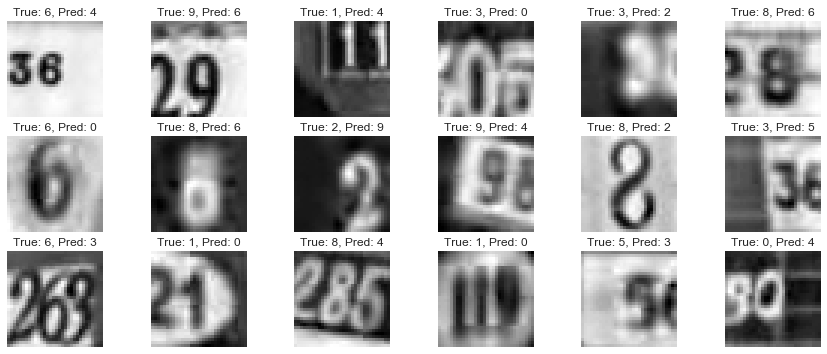

In [53]:
# the incorrectly classified images
incorrect = test_prediction != np.argmax(y_test, axis=1)

# Choose the incorrectly classified images
images = X_test[incorrect]
class_true = y_test[incorrect]
class_pred = test_prediction[incorrect]

# Misclassification plot
plot_the_images(images, 3, 6, class_true, class_pred);

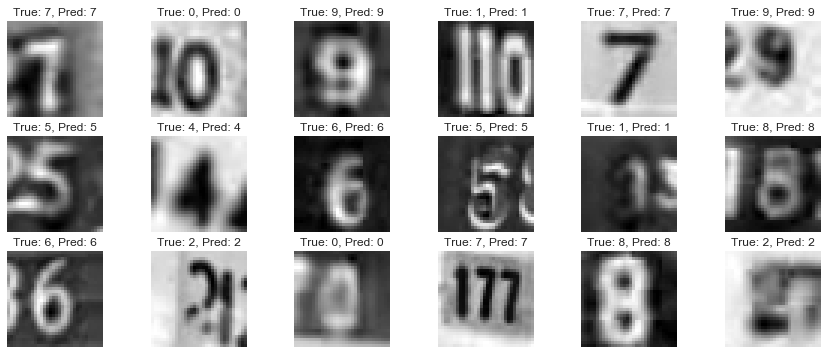

In [54]:
# Find the correctly classified examples
correct = np.invert(incorrect)

# Select the correctly classified examples
images = X_test[correct]
class_true = y_test[correct]
class_pred = test_prediction[correct]

# Plot the classified examples
plot_the_images(images, 3, 6, class_true, class_pred);

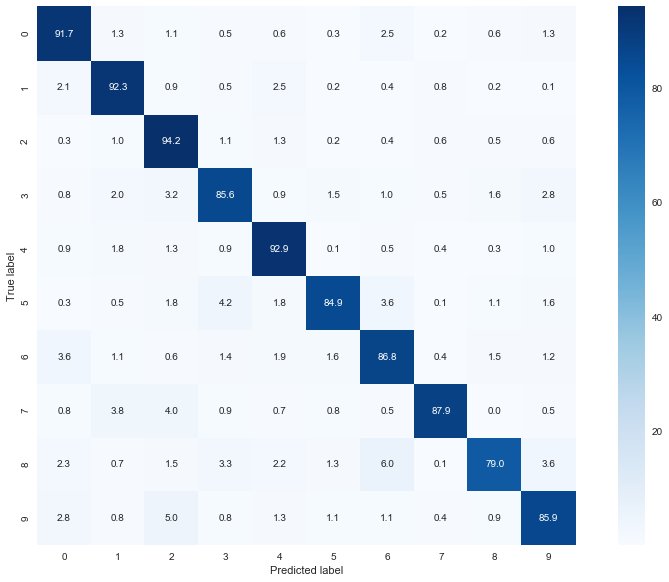

In [55]:
from sklearn.metrics import confusion_matrix

# Set the figure size
plt.figure(figsize=(12, 8))

# Calculate the confusion matrix
cm = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=test_prediction)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100.0

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.1f', square=True);
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
